In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor
#from lightgbm import LGBMRegressor
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

In [2]:
df_sample = pd.read_csv("sample_solution.csv")
df_train  = pd.read_csv("train_data.csv")
df_test   = pd.read_csv("test_data.csv")

In [3]:
df_sample

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
4995,4996,0
4996,4997,0
4997,4998,0
4998,4999,0


In [4]:
df_train.head()
# train datasetimizda id ustuni bashoratga bog'liq emas. Shuning uchun o'chiramiz. 

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [5]:
df_train = df_train.drop(columns=["id"], axis = 1)
df_train

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...
19995,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19996,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19997,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822
19998,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,21,6450


In [6]:
df_test.head()
# test datasetimizda id ustuni bashoratga bog'liq emas. Shuning uchun o'chiramiz. 

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [7]:
df_test = df_test.drop(columns=["id"], axis = 1)
df_test

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35
...,...,...,...,...,...,...,...,...,...,...
4995,Air_India,AI-768,Kolkata,Afternoon,one,Morning,Bangalore,Business,17.42,15
4996,Indigo,6E-6214,Kolkata,Morning,zero,Afternoon,Mumbai,Economy,3.00,40
4997,Air_India,AI-402,Kolkata,Morning,one,Night,Mumbai,Business,11.17,37
4998,Air_India,AI-673,Mumbai,Early_Morning,one,Night,Hyderabad,Business,13.33,38


In [8]:
df_train.shape
# ustun va qatorlar sonini bilib olamiz

(20000, 11)

In [9]:
df_test.shape
# ustun va qatorlar sonini bilib olamiz

(5000, 10)

In [10]:
# train va test qiymatlar nisbati
print("train = ", 20000/25000*100)
print("test = ", 5000/25000*100)

train =  80.0
test =  20.0


Juda yaxshi taqsimlanganligi ko'rinib turibdi. Bizga train, test metodlari kerak emas.

In [11]:
# bo'sh qiymatlarga tekshiramiz
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.7+ MB


In [12]:
# bo'sh qiymatlarga tekshiramiz
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           5000 non-null   object 
 1   flight            5000 non-null   object 
 2   source_city       5000 non-null   object 
 3   departure_time    5000 non-null   object 
 4   stops             5000 non-null   object 
 5   arrival_time      5000 non-null   object 
 6   destination_city  5000 non-null   object 
 7   class             5000 non-null   object 
 8   duration          5000 non-null   float64
 9   days_left         5000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 390.8+ KB


Ko'rinib turibdiki hamma qiymatlar mavjud.
Endi flight ustunini ikkiga bo'lamiz 

In [13]:
df_train["republik"] = df_train["flight"].apply(lambda x: x[:2])
df_train["flight_number"] = df_train["flight"].apply(lambda x: int(x[3::]))
df_test["republik"] = df_test["flight"].apply(lambda x: x[:2])
df_test["flight_number"] = df_test["flight"].apply(lambda x: int(x[3::]))
df_train

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,republik,flight_number
0,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212,UK,810
1,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292,SG,5094
2,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553,UK,846
3,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760,UK,706
4,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712,6E,5394
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153,6E,6178
19996,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911,I5,582
19997,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822,UK,832
19998,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,21,6450,UK,996


In [14]:
#Endi flight ustunini o'chirsak ham bo'ladi
df_train = df_train.drop(columns=["flight"])
df_test = df_test.drop(columns=["flight"])

In [15]:
df_train["flight_number"].astype(int)
df_test["flight_number"].astype(int)

0        765
1        747
2        570
3        974
4        770
        ... 
4995     768
4996    6214
4997     402
4998     673
4999     774
Name: flight_number, Length: 5000, dtype: int32

In [16]:
# endi navbat kategorial ma'lumotlarni raqamli ko'rinishga o'tkazamiz.
train_kategorial = df_train.select_dtypes(include='object').columns
train_kategorial

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'republik'],
      dtype='object')

In [17]:
df_cat = pd.get_dummies(df_train, columns = train_kategorial, dtype = 'int' )
df_test_cat =  pd.get_dummies(df_test, columns = train_kategorial, dtype = 'int' )

In [18]:
# xarakteristikalarni yaxshilash uchun raqamli ustunlarni standarlab olamiz 
scaler=StandardScaler()
df_cat[["duration", "days_left", "flight_number"]]=scaler.fit_transform(df_train[["duration", "days_left", "flight_number"]])
df_test_cat[["duration", "days_left", "flight_number"]]=scaler.transform(df_test[["duration", "days_left", "flight_number"]])
df_cat

,duration,days_left,price,flight_number,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,republik_6E,republik_AI,republik_G8,republik_I5,republik_SG,republik_UK
0,0.289528,-0.361418,7212,-0.307081,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
1,-1.456827,-1.388976,5292,1.867123,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,-0.362910,-1.535770,60553,-0.288811,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,-0.758285,0.152361,5760,-0.359863,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,-1.421900,-1.609167,10712,2.019378,0,0,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.594826,1.400110,3153,2.417272,0,0,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0
19996,-0.886817,-0.141227,3911,-0.422795,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
19997,3.234582,-0.655006,14822,-0.295916,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
19998,0.580122,-0.361418,6450,-0.212683,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [19]:
# Eng yaxshi koorelaysiyalarni aniqlab olamiz
df_cat.corrwith(df_cat['price']).abs().sort_values(ascending=False)
y = df_cat.price
X = df_cat.drop(columns = ["price"], axis = 1 )

(array([1.2642e+04, 1.2600e+03, 4.6100e+02, 1.1740e+03, 2.4000e+03,
        1.5160e+03, 4.1400e+02, 1.1000e+02, 1.9000e+01, 4.0000e+00]),
 array([  1105. ,  12446.8,  23788.6,  35130.4,  46472.2,  57814. ,
         69155.8,  80497.6,  91839.4, 103181.2, 114523. ]),
 <BarContainer object of 10 artists>)

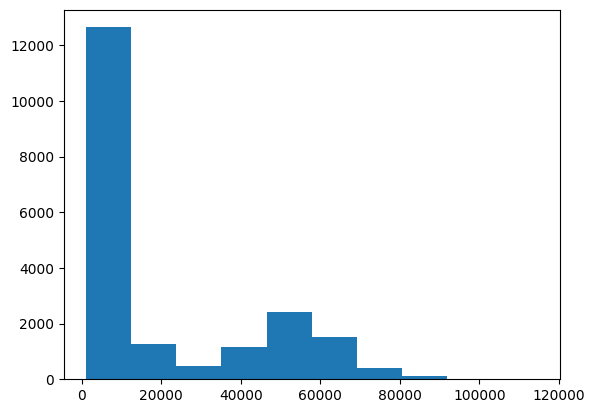

In [20]:
# datasetdagi balansni price ustuni bo'yichako'ramiz
plt.hist(df_cat.price)

In [21]:
#Datasetimizni balansi yaxshi emas chunki 20 000 ta qatordan deyarli 13 0000 tasi 10 0000 atrofida qolgan kattaroq summalarda ma'lumot kam  
from sklearn.model_selection import train_test_split
# ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 42)
#Yaxshi madel tanlaymiz

In [22]:
lr = LogisticRegression(solver ='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

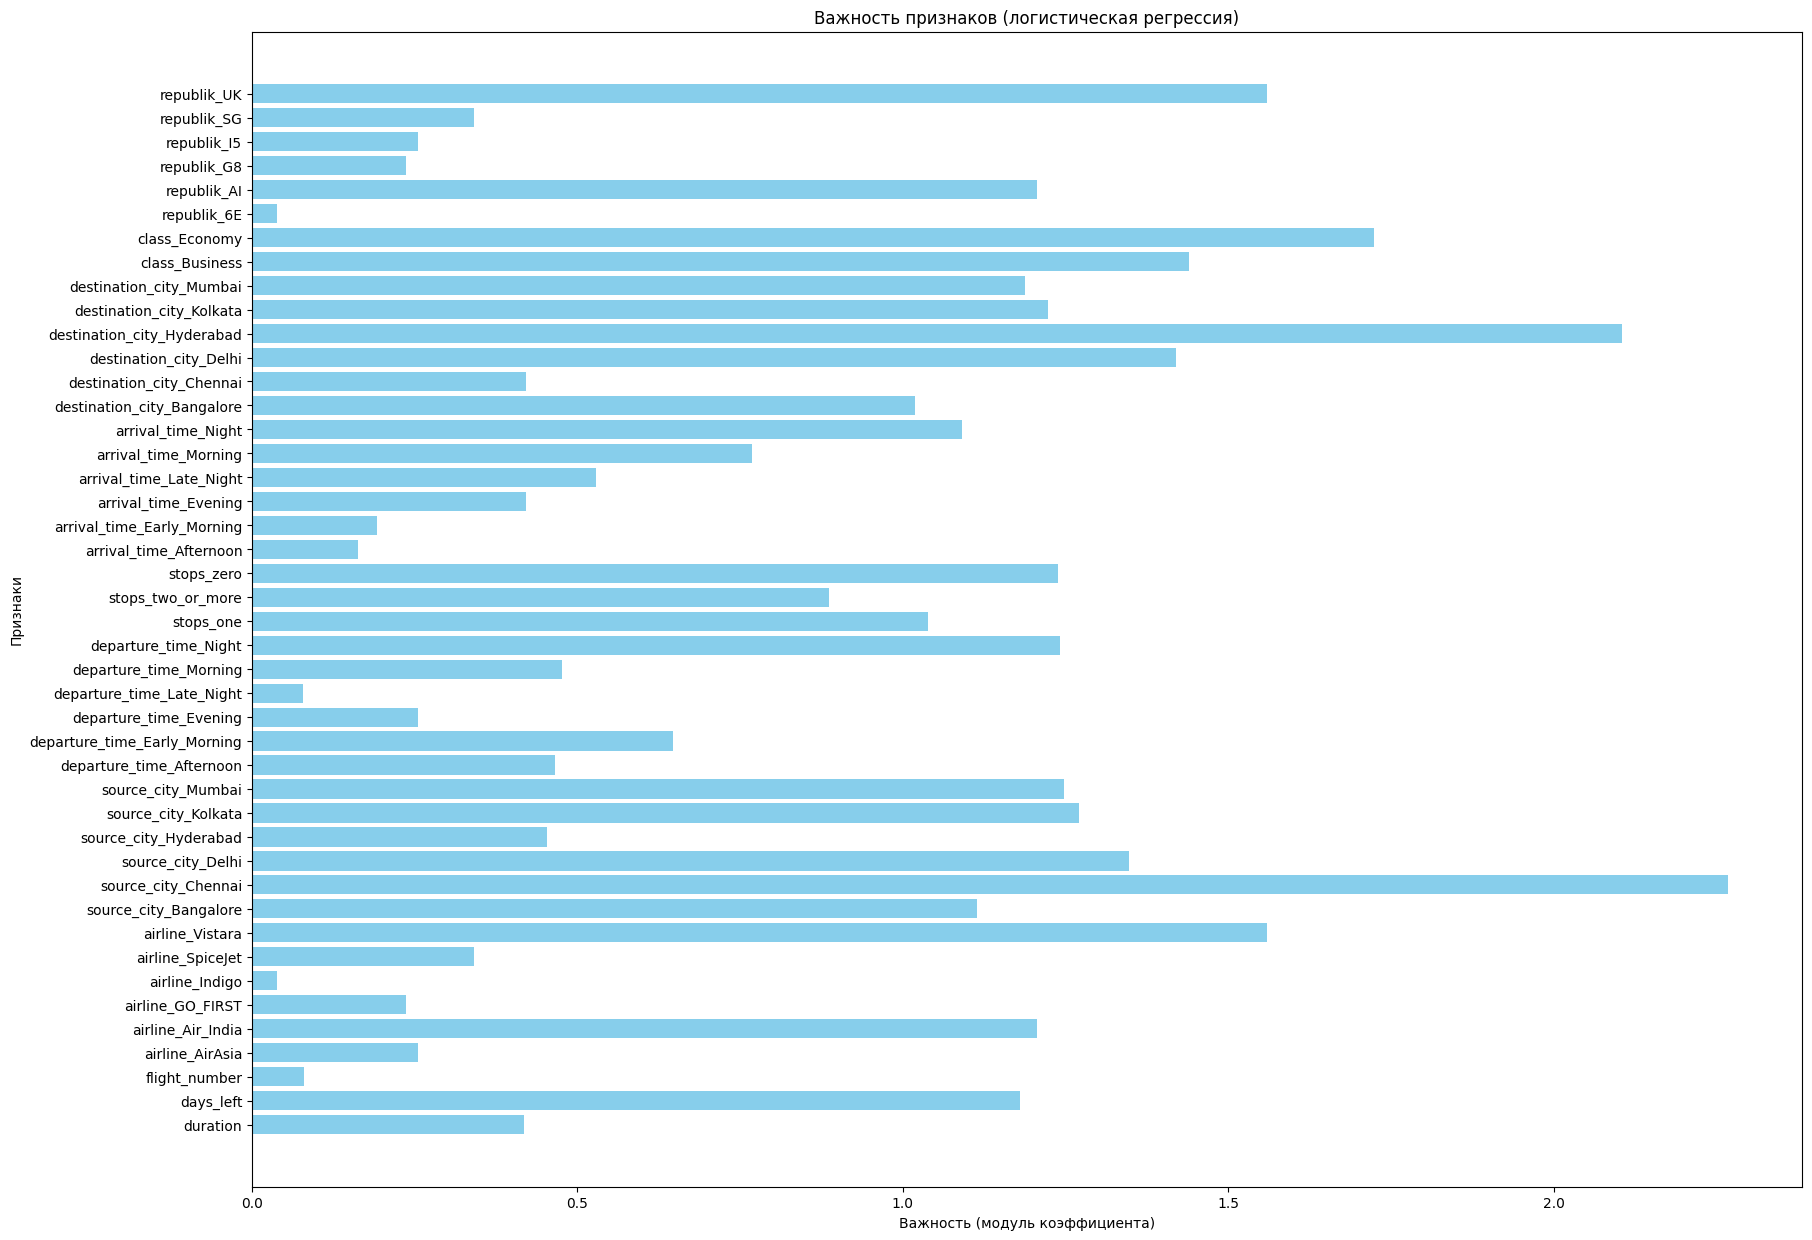

In [23]:
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

# 1. Важность признаков для логистической регрессии
# Веса для логистической регрессии (взяли модуль значений)
lr_importances = np.abs(lr.coef_[0])

# Построение гистограммы для логистической регрессии
plt.figure(figsize=(20, 15))
plt.barh(feature_names, lr_importances, color='skyblue')
plt.title("Важность признаков (логистическая регрессия)")
plt.xlabel("Важность (модуль коэффициента)")
plt.ylabel("Признаки")
plt.show()

In [24]:
y_pred = lr.predict(X_test)
y_pred

array([ 6132, 57017, 65832, 66928,  4417,  3090, 45883,  5950,  4071,
       60396,  5227,  3393,  4294,  4499,  6578, 12150,  2022,  5955,
       44280, 12150, 54684, 60508,  2098,  8112,  2050,  6195, 56588,
       62045,  6578,  3584,  5772,  5943,  7412,  6132,  4086, 51697,
       11675, 53743,  1603,  3291,  7927, 45883,  3090, 64831,  5955,
       69168,  4827,  4099, 69244, 53152,  3336,  3393,  5070,  6128,
        4086, 39321,  5102, 50271, 64285, 60365,  4230,  7221,  5042,
        6578,  2074,  5960,  2477,  4165, 53164, 10018, 64173, 54684,
        4205, 11488,  8112,  4079, 11205, 45257,  6287, 52063, 58125,
        6461,  4367,  6437,  9277,  4496,  3324, 54841, 45693,  4048,
       52287,  7412,  4500,  6195,  8112,  5955,  4229, 44069, 50969,
       45257,  4262,  2276,  3393,  2476, 62045,  6133,  7424,  6128,
        6489,  6082,  1998,  3090,  2477,  6489,  6502,  5060, 11488,
       55502,  8111, 51595,  7412,  4230, 45883,  4755,  5037,  2203,
       42457,  1105,

In [25]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
# count RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
# count MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

RMSE: 5223.726907582363
MAE: 2170.805


In [26]:
# 2. Решающее дерево
dt = DecisionTreeClassifier(criterion ='entropy', max_depth = 15  )
dt.fit(X_train, y_train)
# Оценка на тестовых данных
y_pred_proba_dt = dt.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_proba_dt)
# count RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
# count MAE
mae = mean_absolute_error(y_test, y_pred_proba_dt)
print(f"MAE: {mae}")

RMSE: 4391.3230062248895
MAE: 1606.395


In [27]:
#2. Случайный лес
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)

# Make predictions
y_predicted = RF_model.predict(X_test)

In [28]:
# Evaluate the RF model
mse = mean_squared_error(y_test, y_predicted)
# count RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
# count MAE
mae = mean_absolute_error(y_test, y_predicted)
print(f"MAE: {mae}")

RMSE: 2577.931653515493
MAE: 1272.928325


In [29]:
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
# Make predictions
y_predicted = xgr.predict(X_test)

In [30]:
# Evaluate the RF model
mse = mean_squared_error(y_test, y_predicted)
# count RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
# count MAE
mae = mean_absolute_error(y_test, y_predicted)
print(f"MAE: {mae}")

RMSE: 2541.10568490085
MAE: 1525.965447692871


In [31]:
# shunday qilib test qiymatlariga eng yaxshi javob bergan model randomforestmodeli bo'ldi. 

In [32]:
best_predict = RF_model.predict(df_test_cat)
best_predict

array([54728.49, 62195.32, 23422.14, ..., 50263.82, 49317.99, 66883.78])

In [33]:
df_sample["price"] = best_predict
df_sample.to_csv("sample_solution.csv", index=False, encoding='utf-8')